In [ ]:
import tensorflow as tf
import glob

# Set the path to your image dataset
image_dir = "path/to/your/image/dataset/*.jpg"

# Get the list of image file paths
image_paths = glob.glob(image_dir)

# Create a tf.data.Dataset from the image file paths
dataset = tf.data.Dataset.from_tensor_slices(image_paths)

# Define a function to load and preprocess the images
def load_image(image_path):
    # Load the image using tf.io.read_file and tf.image.decode_image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    
    # Preprocess the image (e.g., resize, normalize, etc.)
    # ...
    
    return image

# Map the load_image function to each image path in the dataset
dataset = dataset.map(load_image)

# Define the batch size
batch_size = 32

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=len(image_paths))
dataset = dataset.batch(batch_size)

# Iterate over the dataset
for batch in dataset:
    # Perform operations on each batch of images
    # ...
    pass


### Image segmentation mask creator

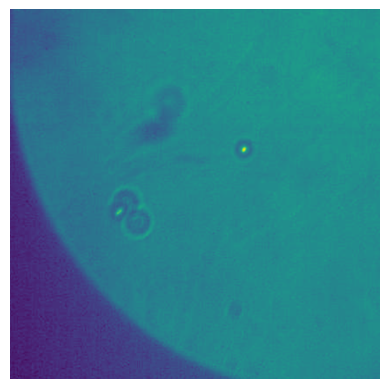

In [4]:
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Load and visualize random image from the dataset
# Specify the directory path
directory_path = "C:/Users/vinay/Dropbox/IITKanpur/Codes_Latest/Tweezer_Code/27808_1_3/cropped_dataset"

# Get the list of image file paths in the directory
image_paths = glob.glob(directory_path + "/*.tiff")

# Select a random image path from the list
random_image_path = random.choice(image_paths)

# Load and display the random image
random_image = plt.imread(random_image_path)
plt.imshow(random_image)
plt.axis('off')
plt.show()


### Load the pre-processed segmentation masks circle coordinates from the `final_segmenation_data.csv` file

In [ ]:
# Read the pandas dataframe and then draw the images using the mesh-grid...

parent_folder = "C:/Users/vinay/Dropbox/IITKanpur/Codes_Latest/Tweezer_Code/27808_1_3"
directory_path = os.path.join(parent_folder, "cropped_dataset_segmentation_mask")
filename = "final_segmentation_data.csv"
df = pd.read_csv(os.path.join(directory_path, filename))

# Convert second column to integer( this displays the image number in the dataset)
df.iloc[:,1] = df.iloc[:,1].astype(int)

### Segmentation mask creator

In the following code:
- We will first match the seccond column to the image number
- For each image we will then use `np.ogrid` function to create the meshes and different circles.
   

In [4]:
# Specify the value to match in column 1
value_to_match = 1

# Slice the dataframe based on the condition
sliced_df = df[df.iloc[:, 1] == value_to_match]

# Display the sliced dataframe
print(sliced_df)




   index  axis-0      axis-1      axis-2
5    5.0       1  268.426770  177.442115
6    6.0       1  256.494356  267.929584
7    7.0       1  212.742173  224.177401
8    8.0       1  241.578839  223.183033
9    9.0       1  112.311026  255.997170


#### Drawing the circles on the image with known radius

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the size of the image
image_width = 512
image_height =512

# Create a mesh grid of coordinates
x, y = np.ogrid[0:image_width, 0:image_height]

# Specify the radius of the circles
radius = 5

# Specify the coordinates of the circles
circle_coordinates = [(100, 100), (200, 200), (300, 300)]

# Create a blank image
image = np.zeros((image_width, image_height), dtype=np.uint8)

# Iterate over the coordinates and draw circles on the image
for cx, cy in circle_coordinates:
    # Calculate the distance from each point in the grid to the center of the circle
    distance = np.sqrt((x - cx)**2 + (y - cy)**2)
    
    # Set the pixels within the radius of the circle to white
    image[distance <= radius] = 255

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



In [9]:
sliced_df

,index,axis-0,axis-1,axis-2
5,5.0,1,268.426770,177.442115
6,6.0,1,256.494356,267.929584
7,7.0,1,212.742173,224.177401
8,8.0,1,241.578839,223.183033
9,9.0,1,112.311026,255.997170


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the size of the image
image_width = 512
image_height = 512

# Create a mesh grid of coordinates
x, y = np.ogrid[0:image_width, 0:image_height]



In [47]:
import numpy as np



axis_0_values = np.array(df['axis-0'])
max_value = np.max(axis_0_values)

print(max_value)


696


In [51]:
# Specify the radius of the circles
radius = 5

# Create a blank image
image = np.zeros((image_width, image_height), dtype=np.uint8)
import tifffile as tiff
# Iterate over the coordinates and draw circles on the image


# Specify the value to match in column 1


for i in range(0, max_value+1):
    value_to_match = i
    # Slice the dataframe based on the condition
    sliced_df = df[df.iloc[:, 1] == value_to_match]
    print(sliced_df)
    for index, row in sliced_df.iterrows():
        cx = row['axis-1']
        cy = row['axis-2']
    
        # Calculate the distance from each point in the grid to the center of the circle
        distance = np.sqrt((x - cx)**2 + (y - cy)**2)
    
        # Set the pixels within the radius of the circle to red
        image[distance <= radius] = 255

    tiff.imwrite("cropped_dataset_segmentation_mask\\{:05d}_mask.tiff".format(i), image)
    image = np.zeros((image_width, image_height), dtype=np.uint8)


   index  axis-0      axis-1      axis-2
0    0.0       0  270.415505  177.442115
1    1.0       0  216.719644  226.166137
2    2.0       0  244.561943  228.154872
3    3.0       0  256.494356  268.923952
4    4.0       0  113.305394  253.014067
   index  axis-0      axis-1      axis-2
5    5.0       1  268.426770  177.442115
6    6.0       1  256.494356  267.929584
7    7.0       1  212.742173  224.177401
8    8.0       1  241.578839  223.183033
9    9.0       1  112.311026  255.997170
    index  axis-0      axis-1      axis-2
10   10.0       2  269.421137  176.447747
11   11.0       2  214.730909  226.166137
12   12.0       2  243.567575  227.160504
13   13.0       2  256.494356  269.918319
14   14.0       2  113.305394  255.997170
    index  axis-0      axis-1      axis-2
15   15.0       3  267.432402  176.447747
16   16.0       3  220.697116  227.160504
17   17.0       3  247.545046  226.166137
18   18.0       3  255.499988  269.918319
19   19.0       3  112.311026  252.019699
    

In [ ]:
for i in range(11):
    print("{:03d}".format(i))


In [25]:
value_to_match = 1

# Slice the dataframe based on the condition
sliced_df = df[df.iloc[:, 1] == value_to_match]

# Display the sliced dataframe
print(sliced_df)


#
for index, row in sliced_df.iterrows():
    cx = row['axis-1']
    cy = row['axis-2']
    
    # Calculate the distance from each point in the grid to the center of the circle
    distance = np.sqrt((x - cx)**2 + (y - cy)**2)
    
    # Set the pixels within the radius of the circle to red
    image[distance <= radius] = 255

tiff.imwrite("image_1.tiff", image)




In [29]:
import glob
file_list = glob.glob(os.path.join(parent_folder, "cropped_dataset/*.tiff"))

In [31]:
## Now compare the original image ad the corresponding mask image and see if the mask image is correct or not...

# Read the original image

original_image = tiff.imread(file_list[0])

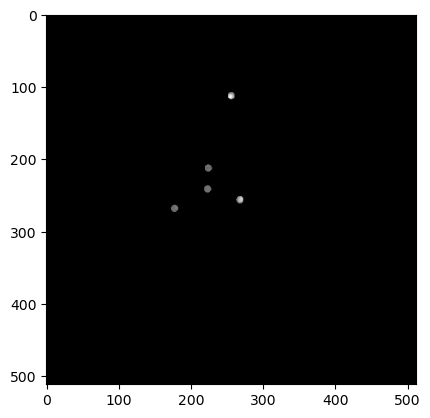

In [43]:
plt.imshow(original_image*(image/255), cmap='gray')

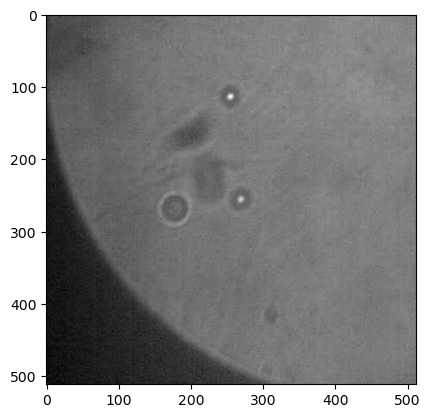

In [36]:
plt.imshow(original_image, cmap='gray')

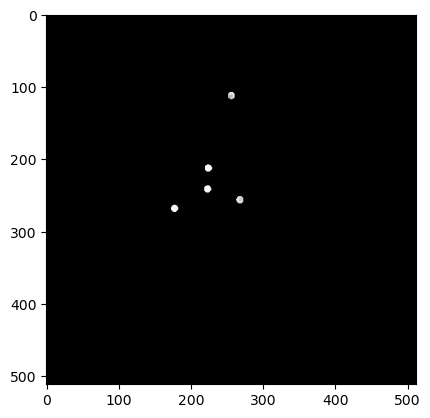

In [35]:
plt.imshow(original_image*image/255, cmap='gray')